# multiple models regional bias, RMSE, WSS plots

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import os
import csv

In [24]:
yrst = 1991
yrend = 2021
modlist = ['TOM12_TJ_GEA0', 'TOM12_TJ_GEA1', 'TOM12_TJ_CNA1']

In [25]:
def read_csv_data(csv_file_path):
    data = []
    with open(csv_file_path, 'r') as file:
        csv_reader = csv.reader(file)
        for row in csv_reader:
            data.append(row)
    return data


# Create empty lists to store REG, bias, RMSE and WSS data for each model
reg_data = {model: [] for model in modlist}
bias_DIC_data = {model: [] for model in modlist}
RMSE_DIC_data = {model: [] for model in modlist}
WSS_DIC_data = {model: [] for model in modlist}
bias_TA_data = {model: [] for model in modlist}
RMSE_TA_data = {model: [] for model in modlist}
WSS_TA_data = {model: [] for model in modlist}
bias_TADIC_data = {model: [] for model in modlist}
RMSE_TADIC_data = {model: [] for model in modlist}
WSS_TADIC_data = {model: [] for model in modlist}


for model in modlist:
     # Build CSV file name and path
    csv_file_name = f'{yrst}-{yrend}_{model}_bias_RMSE_WSS_mean_umolL_region.csv'
    directory_path = os.path.join("/gpfs/home/gdg21vsa/ModelEvaluation/", model)
    csv_file_path = os.path.join(directory_path, csv_file_name)

    with open(csv_file_path, 'r') as file:
        csv_reader = csv.reader(file)

        # Skip Table Header
        headers = next(csv_reader)

        for row in csv_reader:
            # Get the column indexes of the bias and REG data, which are in columns 2 and 1, respectively
            reg_value = float(row[0])
            bias_DIC_value = float(row[1])
            RMSE_DIC_value = float(row[2])
            WSS_DIC_value = float(row[3])
            bias_TA_value = float(row[4])
            RMSE_TA_value = float(row[5])
            WSS_TA_value = float(row[6])
            bias_TADIC_value = float(row[7])
            RMSE_TADIC_value = float(row[8])
            WSS_TADIC_value = float(row[9])

            # Store data into a list of corresponding models
            reg_data[model].append(reg_value)
            bias_DIC_data[model].append(bias_DIC_value)
            RMSE_DIC_data [model].append(RMSE_DIC_value)
            WSS_DIC_data[model].append(WSS_DIC_value)
            bias_TA_data [model].append(bias_TA_value)
            RMSE_TA_data [model].append(RMSE_TA_value)
            WSS_TA_data [model].append(WSS_TA_value)
            bias_TADIC_data [model].append(bias_TADIC_value)
            RMSE_TADIC_data [model].append(RMSE_TADIC_value)
            WSS_TADIC_data [model].append(WSS_TADIC_value)


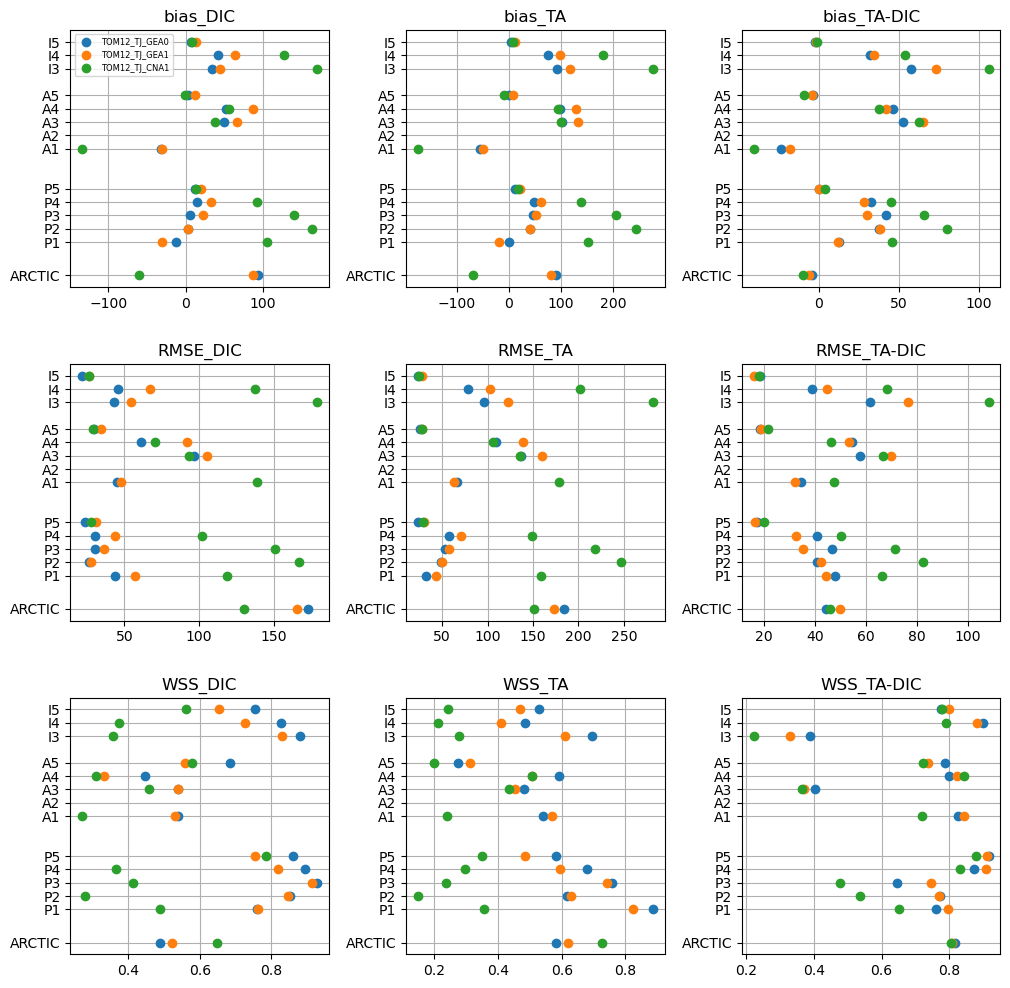

In [38]:
y = (0.5, 1.0, 1.2, 1.4, 1.6, 1.8, 2.4, 2.6, 2.8, 3, 3.2, 3.6, 3.8, 4)
labels = ['ARCTIC', 'P1', 'P2', 'P3', 'P4', 'P5', 'A1', 'A2', 'A3', 'A4', 'A5', 'I3', 'I4', 'I5']

fig, axes = plt.subplots(3, 3, figsize=(12, 12))

for model in modlist:
    axes[0, 0].plot(bias_DIC_data[model], reg_data[model],'o',label=model)
    axes[0, 0].set_title('bias_DIC')
    axes[0, 0].set_yticks(y, labels)
    axes[0, 0].legend(loc='upper left', prop={'size': 6})
    axes[0, 0].grid(True)

    axes[0, 1].plot(bias_TA_data [model], reg_data[model], 'o')
    axes[0, 1].set_title('bias_TA')
    axes[0, 1].set_yticks(y, labels)
    axes[0, 1].grid(True)

    axes[0, 2].plot(bias_TADIC_data [model], reg_data[model], 'o')
    axes[0, 2].set_title('bias_TA-DIC')
    axes[0, 2].set_yticks(y, labels)
    axes[0, 2].grid(True)

    axes[1, 0].plot(RMSE_DIC_data [model], reg_data[model], 'o')
    axes[1, 0].set_title('RMSE_DIC')
    axes[1, 0].set_yticks(y, labels)
    axes[1, 0].grid(True)

    axes[1, 1].plot(RMSE_TA_data [model], reg_data[model], 'o')
    axes[1, 1].set_title('RMSE_TA')
    axes[1, 1].set_yticks(y, labels)
    axes[1, 1].grid(True)

    axes[1, 2].plot(RMSE_TADIC_data [model], reg_data[model], 'o')
    axes[1, 2].set_title('RMSE_TA-DIC')
    axes[1, 2].set_yticks(y, labels)
    axes[1, 2].grid(True)

    axes[2, 0].plot(WSS_DIC_data[model], reg_data[model], 'o')
    axes[2, 0].set_title('WSS_DIC')
    axes[2, 0].set_yticks(y, labels)
    axes[2, 0].grid(True)

    axes[2, 1].plot(WSS_TA_data [model], reg_data[model], 'o')
    axes[2, 1].set_title('WSS_TA')
    axes[2, 1].set_yticks(y, labels)
    axes[2, 1].grid(True)

    axes[2, 2].plot(WSS_TADIC_data [model], reg_data[model], 'o')
    axes[2, 2].set_title('WSS_TA-DIC')
    axes[2, 2].set_yticks(y, labels)
    axes[2, 2].grid(True)

plt.subplots_adjust(hspace=0.3, wspace=0.3)
